In [2]:
# Import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

import seaborn as sns
sns.set()

pio.renderers.default = 'notebook_connected'

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load in the datasets

df = pd.read_csv('WDI_Dataset.csv',skiprows=4)
dfCountry = pd.read_csv('countries.csv')

In [5]:
# Check for the first five rows

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN


In [6]:
# Check for the first five rows

dfCountry.head()

,country,latitude,longitude,name,country_code,continent
0,AD,42.546245,1.601554,Andorra,AND,Europe
1,AE,23.424076,53.847818,United Arab Emirates,ARE,Asia
2,AF,33.939110,67.709953,Afghanistan,AFG,Asia
3,AG,17.060816,-61.796428,Antigua and Barbuda,ATG,North America
4,AI,18.220554,-63.068615,Anguilla,AIA,North America


In [9]:
# Check for the number of rows and columns

df.shape

(20216, 66)

In [10]:
# Check for the number of rows and columns

dfCountry.shape

(242, 6)

In [11]:
# Check for the number of unique country names

df['Country Name'].nunique()

266

In [12]:
# # Check for the number of unique country names

dfCountry['name'].nunique()

242

In [13]:
# Rename columns in the country dataframe

dfCountry = dfCountry.rename(columns={'name':'Country Name', 'longitude':'Longitude', 'latitude':'Latitude', 'country_code':'Country Code', 'continent':'Continent'}, inplace=False)
dfCountry.head()

,country,Latitude,Longitude,Country Name,Country Code,Continent
0,AD,42.546245,1.601554,Andorra,AND,Europe
1,AE,23.424076,53.847818,United Arab Emirates,ARE,Asia
2,AF,33.939110,67.709953,Afghanistan,AFG,Asia
3,AG,17.060816,-61.796428,Antigua and Barbuda,ATG,North America
4,AI,18.220554,-63.068615,Anguilla,AIA,North America


In [14]:
# Select only needed columns

dfCountry_1 = dfCountry.drop(['country'], axis=1)
dfCountry_1.head()

,Latitude,Longitude,Country Name,Country Code,Continent
0,42.546245,1.601554,Andorra,AND,Europe
1,23.424076,53.847818,United Arab Emirates,ARE,Asia
2,33.939110,67.709953,Afghanistan,AFG,Asia
3,17.060816,-61.796428,Antigua and Barbuda,ATG,North America
4,18.220554,-63.068615,Anguilla,AIA,North America


In [15]:
# Check for missing observations

df.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              17076
                  ...  
2017              12149
2018              12771
2019              16498
2020              17217
Unnamed: 65       20216
Length: 66, dtype: int64

In [16]:
# Check for missing observations

dfCountry_1.isnull().sum()

Latitude        1
Longitude       1
Country Name    0
Country Code    0
Continent       0
dtype: int64

In [17]:
# Drop missing observations

dfCountry_1 = dfCountry_1.dropna(inplace=False)

In [18]:
# Check for missing observations

dfCountry_1.isnull().sum()

Latitude        0
Longitude       0
Country Name    0
Country Code    0
Continent       0
dtype: int64

In [19]:
# Merge the two dataframes

df_merged = df.merge(dfCountry_1, on=['Country Name', 'Country Code'])
df_merged.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,Unnamed: 65,Latitude,Longitude,Continent
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN,12.52111,-69.968338,North America
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN,12.52111,-69.968338,North America
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN,12.52111,-69.968338,North America
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN,12.52111,-69.968338,North America
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN,12.52111,-69.968338,North America


In [20]:
# Check for the number of rows and columns upon merging

df_merged.shape

(13756, 69)

In [21]:
#  Check for the number of unique countries in the merged dataframe
df_merged['Country Name'].nunique()

181

Prior to the merging of the two datasets (WDI and countries), there are 266 unique countries in the WDI dataset, and 242 unique countries in the countries datasets. However, upon the merging, we had 181 unique countries. What informed our decision of merging an additional dataset (countries) is the fact that we observed that there were some aggregrated data (such as Africa Eastern and Western, and more). Using the raw data (WDI) will give a misleading result and would affect whatever decision/judgement made on the data.

In [22]:
# Check for the number of missing observations

df_merged.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              11590
                  ...  
2020              11734
Unnamed: 65       13756
Latitude              0
Longitude             0
Continent             0
Length: 69, dtype: int64

In [23]:
# Pick an indicator from the list of indicators

df_CO2 = df_merged[df_merged['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)']
df_CO2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,Unnamed: 65,Latitude,Longitude,Continent
40,Aruba,ABW,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.521110,-69.968338,North America
116,Afghanistan,AFG,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111232,0.105424,0.098779,0.096105,NaN,NaN,NaN,33.939110,67.709953,Asia
192,Angola,AGO,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.171844,0.172837,0.141476,0.124984,NaN,NaN,NaN,-11.202692,17.873887,Africa
268,Albania,ALB,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.150956,0.141911,0.152602,0.143865,NaN,NaN,NaN,41.153332,20.168331,Europe
344,Andorra,AND,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.546245,1.601554,Europe


In [24]:
# Melt the dataframe

df_CO2_melted = df_CO2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Latitude', 'Longitude', 'Continent',], var_name='Year', value_name='CO2 emissions (kg per PPP $ of GDP)')
df_CO2_melted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Latitude,Longitude,Continent,Year,CO2 emissions (kg per PPP $ of GDP)
0,Aruba,ABW,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,12.521110,-69.968338,North America,1960,NaN
1,Afghanistan,AFG,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,33.939110,67.709953,Asia,1960,NaN
2,Angola,AGO,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,-11.202692,17.873887,Africa,1960,NaN
3,Albania,ALB,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,41.153332,20.168331,Europe,1960,NaN
4,Andorra,AND,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,42.546245,1.601554,Europe,1960,NaN


In [25]:
# Drop unneeded columns

df_CO2_melted_1 = df_CO2_melted.drop(['Indicator Name', 'Indicator Code', ], axis=1)
df_CO2_melted_1.head()

,Country Name,Country Code,Latitude,Longitude,Continent,Year,CO2 emissions (kg per PPP $ of GDP)
0,Aruba,ABW,12.521110,-69.968338,North America,1960,NaN
1,Afghanistan,AFG,33.939110,67.709953,Asia,1960,NaN
2,Angola,AGO,-11.202692,17.873887,Africa,1960,NaN
3,Albania,ALB,41.153332,20.168331,Europe,1960,NaN
4,Andorra,AND,42.546245,1.601554,Europe,1960,NaN


In [26]:
# Check for the number of rows and columns

df_CO2_melted_1.shape

(11222, 7)

In [27]:
# Check for missing observations

df_CO2_melted_1.isnull().sum()

Country Name                              0
Country Code                              0
Latitude                                  0
Longitude                                 0
Continent                                 0
Year                                      0
CO2 emissions (kg per PPP $ of GDP)    6763
dtype: int64

In [28]:
# Drop missing observations

df_CO2_melted_2 = df_CO2_melted_1.dropna(inplace=False)
df_CO2_melted_2.head()

,Country Name,Country Code,Latitude,Longitude,Continent,Year,CO2 emissions (kg per PPP $ of GDP)
5432,Angola,AGO,-11.202692,17.873887,Africa,1990,0.162920
5433,Albania,ALB,41.153332,20.168331,Europe,1990,0.722433
5435,United Arab Emirates,ARE,23.424076,53.847818,Asia,1990,0.347578
5436,Argentina,ARG,-38.416097,-63.616672,South America,1990,0.425641
5437,Armenia,ARM,40.069099,45.038189,Europe,1990,2.023774


In [29]:
# Check for the number of rows and columns

df_CO2_melted_2.shape

(4459, 7)

In [30]:
# Check for the number of records from each continent

df_CO2_melted_2.Continent.value_counts()

Africa           1229
Europe           1163
Asia              880
North America     515
Oceania           353
South America     319
Name: Continent, dtype: int64

In [31]:
# Create a function to encode the categorical (or non-numeric) variable into numerical values

def encode_label(df):
   
    le = LabelEncoder()

    df_CO2_melted_2["Country_le"] = le.fit_transform(df_CO2_melted_2["Country Name"])
    df_CO2_melted_2['Continent_le'] = le.fit_transform(df_CO2_melted_2['Continent'])


encode_label(df_CO2_melted_2)

In [32]:
# Drop continent off the dataframe

x = df_CO2_melted_2.drop(['Continent'], axis=1)
x.head()

,Country Name,Country Code,Latitude,Longitude,Year,CO2 emissions (kg per PPP $ of GDP),Country_le,Continent_le
5432,Angola,AGO,-11.202692,17.873887,1990,0.162920,3,0
5433,Albania,ALB,41.153332,20.168331,1990,0.722433,1,2
5435,United Arab Emirates,ARE,23.424076,53.847818,1990,0.347578,152,1
5436,Argentina,ARG,-38.416097,-63.616672,1990,0.425641,5,5
5437,Armenia,ARM,40.069099,45.038189,1990,2.023774,6,2


In [33]:
X = x.iloc[:, 2:]
X.head()

,Latitude,Longitude,Year,CO2 emissions (kg per PPP $ of GDP),Country_le,Continent_le
5432,-11.202692,17.873887,1990,0.162920,3,0
5433,41.153332,20.168331,1990,0.722433,1,2
5435,23.424076,53.847818,1990,0.347578,152,1
5436,-38.416097,-63.616672,1990,0.425641,5,5
5437,40.069099,45.038189,1990,2.023774,6,2


### Determine the number of optimized clusters to use

Here, we shall use the elbow method to determine the number of optimized clusters to use for our modeling. The number of connecting points discovered on the WCSS chart will determine the number of clusters to use for an optimal result.

In [34]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

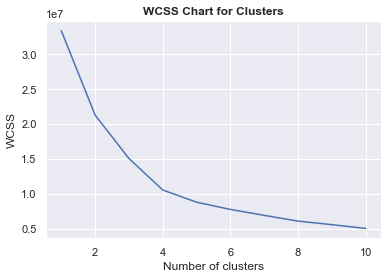

In [71]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS Chart for Clusters', fontweight='bold')
plt.show()

From the above chart, we observed that the optimized number of clusters is 4

In [36]:
X.head()

,Latitude,Longitude,Year,CO2 emissions (kg per PPP $ of GDP),Country_le,Continent_le
5432,-11.202692,17.873887,1990,0.162920,3,0
5433,41.153332,20.168331,1990,0.722433,1,2
5435,23.424076,53.847818,1990,0.347578,152,1
5436,-38.416097,-63.616672,1990,0.425641,5,5
5437,40.069099,45.038189,1990,2.023774,6,2


In [37]:
# Create a function for fitting the clustering model

def clustering(df):
    km = KMeans(n_clusters=4)
    km

    y_predicted = km.fit_predict(X[["Country_le","Year"]])
    
    return y_predicted

In [38]:
X['Clustered'] = clustering(X)
X.head()

,Latitude,Longitude,Year,CO2 emissions (kg per PPP $ of GDP),Country_le,Continent_le,Clustered
5432,-11.202692,17.873887,1990,0.162920,3,0,2
5433,41.153332,20.168331,1990,0.722433,1,2,2
5435,23.424076,53.847818,1990,0.347578,152,1,3
5436,-38.416097,-63.616672,1990,0.425641,5,5,2
5437,40.069099,45.038189,1990,2.023774,6,2,2


In [39]:
# Check for the number of observations in each cluster

X.Clustered.value_counts()

0    1156
1    1109
2    1106
3    1088
Name: Clustered, dtype: int64

We observed from the above that cluster 2 had the most observations

In [40]:
# Check for the number of records in each year (this will later be used for comparison analysis)

X.Year.value_counts().head(10)

2018    160
2017    160
2016    160
2015    160
2014    160
2013    160
2005    159
2011    159
2010    159
2009    159
Name: Year, dtype: int64

In [41]:
# Merge dataframes

data = X.merge(df_CO2_melted_2, on=['Latitude', 'Longitude', 'Continent_le', 'Country_le', 'Year', 'CO2 emissions (kg per PPP $ of GDP)', ])
data.head()

,Latitude,Longitude,Year,CO2 emissions (kg per PPP $ of GDP),Country_le,Continent_le,Clustered,Country Name,Country Code,Continent
0,-11.202692,17.873887,1990,0.162920,3,0,2,Angola,AGO,Africa
1,41.153332,20.168331,1990,0.722433,1,2,2,Albania,ALB,Europe
2,23.424076,53.847818,1990,0.347578,152,1,3,United Arab Emirates,ARE,Asia
3,-38.416097,-63.616672,1990,0.425641,5,5,2,Argentina,ARG,South America
4,40.069099,45.038189,1990,2.023774,6,2,2,Armenia,ARM,Europe


In [42]:
data_grouped = data.groupby(['Country Name', 'Continent', 'Year']).mean().reset_index()
data_grouped = data_grouped.drop(['Country_le', 'Continent_le'], axis=1)
data_grouped.head()

,Country Name,Continent,Year,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
0,Afghanistan,Asia,2002,33.93911,67.709953,0.055496,2.0
1,Afghanistan,Asia,2003,33.93911,67.709953,0.061441,2.0
2,Afghanistan,Asia,2004,33.93911,67.709953,0.049381,2.0
3,Afghanistan,Asia,2005,33.93911,67.709953,0.062487,2.0
4,Afghanistan,Asia,2006,33.93911,67.709953,0.068098,2.0


In [43]:
# Round clustered value to the nearest whole number

data_grouped['Clustered'] = data_grouped['Clustered'].round(0)

In [74]:
fig = px.scatter(data_grouped, x='Latitude', y='Longitude', color='Clustered',
                hover_data=['CO2 emissions (kg per PPP $ of GDP)', 'Country Name', 'Continent'], 
                title='Scatter Plot of Clustered Data')
fig.show()

## Comparative Analytics

### Creating different dataframes for the respective clusters

Here, we shall be considering records between years 2013 and 2018 respectively

In [45]:
data_grouped_comparative = data_grouped[data_grouped['Year'].between('2013', '2018')]
data_grouped_comparative.head()

,Country Name,Continent,Year,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
11,Afghanistan,Asia,2013,33.93911,67.709953,0.130843,2.0
12,Afghanistan,Asia,2014,33.93911,67.709953,0.113093,2.0
13,Afghanistan,Asia,2015,33.93911,67.709953,0.111232,2.0
14,Afghanistan,Asia,2016,33.93911,67.709953,0.105424,2.0
15,Afghanistan,Asia,2017,33.93911,67.709953,0.098779,2.0


In [46]:
data_grouped_comparative.shape

(960, 7)

In [47]:
data_grouped_comparative.Clustered.value_counts()

1.0    246
2.0    240
0.0    240
3.0    234
Name: Clustered, dtype: int64

#### Cluster 1

In [48]:
df_cluster_1 = data_grouped_comparative[data_grouped_comparative['Clustered'] == 0]
df_cluster_1.head()

,Country Name,Continent,Year,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
1129,Dominica,North America,2013,15.414999,-61.370976,0.235930,0.0
1130,Dominica,North America,2014,15.414999,-61.370976,0.232091,0.0
1131,Dominica,North America,2015,15.414999,-61.370976,0.226993,0.0
1132,Dominica,North America,2016,15.414999,-61.370976,0.211246,0.0
1133,Dominica,North America,2017,15.414999,-61.370976,0.210452,0.0


In [49]:
# Group data by Year, Country Name, and Continent

df_cluster_1_grouped = df_cluster_1.groupby(['Year', 'Country Name', 'Continent']).mean().reset_index()
df_cluster_1_grouped.head()

,Year,Country Name,Continent,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
0,2013,Dominica,North America,15.414999,-61.370976,0.235930,0.0
1,2013,Dominican Republic,North America,18.735693,-70.162651,0.169426,0.0
2,2013,Ecuador,South America,-1.831239,-78.183406,0.225062,0.0
3,2013,El Salvador,North America,13.794185,-88.896530,0.149909,0.0
4,2013,Equatorial Guinea,Africa,1.650801,10.267895,0.249849,0.0


In [50]:
# Check for the number of records from each continent

df_cluster_1_grouped.Continent.value_counts()

Europe           72
North America    48
Africa           48
Asia             48
South America    12
Oceania          12
Name: Continent, dtype: int64

In [51]:
fig = px.scatter(df_cluster_1_grouped, x='Year', y='CO2 emissions (kg per PPP $ of GDP)', color='Continent',
                hover_data=['Country Name'], title='Scatter Plot of Cluster 1')
fig.show()

From the above chart, we found that CO2 emissions (kg per PPP $ of GDP) has increased over the years in countries that fell in cluster 1, except for the year 2016 where we had the highest record.

#### Cluster 2

In [52]:
df_cluster_2 = data_grouped_comparative[data_grouped_comparative['Clustered'] == 1]
df_cluster_2.head()

,Country Name,Continent,Year,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
2275,Liberia,Africa,2013,6.428055,-9.429499,0.154388,1.0
2276,Liberia,Africa,2014,6.428055,-9.429499,0.197378,1.0
2277,Liberia,Africa,2015,6.428055,-9.429499,0.214664,1.0
2278,Liberia,Africa,2016,6.428055,-9.429499,0.215000,1.0
2279,Liberia,Africa,2017,6.428055,-9.429499,0.171307,1.0


In [53]:
# Group data by Year, Country Name, and Continent

df_cluster_2_grouped = df_cluster_2.groupby(['Year', 'Country Name', 'Continent']).mean().reset_index()
df_cluster_2_grouped.head()

,Year,Country Name,Continent,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
0,2013,Liberia,Africa,6.428055,-9.429499,0.154388,1.0
1,2013,Libya,Africa,26.335100,17.228331,0.437888,1.0
2,2013,Lithuania,Europe,55.169438,23.881275,0.143356,1.0
3,2013,Luxembourg,Europe,49.815273,6.129583,0.185089,1.0
4,2013,Madagascar,Africa,-18.766947,46.869107,0.083105,1.0


In [54]:
df_cluster_2_grouped.Continent.value_counts()

Africa           78
Europe           60
Asia             48
Oceania          30
North America    18
South America    12
Name: Continent, dtype: int64

In [55]:
fig = px.scatter(df_cluster_2_grouped, x='Year', y='CO2 emissions (kg per PPP $ of GDP)', color='Continent',
                hover_data=['Country Name'], title='Scatter Plot of Cluster 2')
fig.show()

#### Cluster 3

In [56]:
df_cluster_3 = data_grouped_comparative[data_grouped_comparative['Clustered'] == 2]
df_cluster_3.head()

,Country Name,Continent,Year,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
11,Afghanistan,Asia,2013,33.93911,67.709953,0.130843,2.0
12,Afghanistan,Asia,2014,33.93911,67.709953,0.113093,2.0
13,Afghanistan,Asia,2015,33.93911,67.709953,0.111232,2.0
14,Afghanistan,Asia,2016,33.93911,67.709953,0.105424,2.0
15,Afghanistan,Asia,2017,33.93911,67.709953,0.098779,2.0


In [57]:
df_cluster_3_grouped = df_cluster_3.groupby(['Year', 'Country Name', 'Continent']).mean().reset_index()
df_cluster_3_grouped.head()

,Year,Country Name,Continent,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
0,2013,Afghanistan,Asia,33.939110,67.709953,0.130843,2.0
1,2013,Albania,Europe,41.153332,20.168331,0.156516,2.0
2,2013,Algeria,Africa,28.033886,1.659626,0.260870,2.0
3,2013,Angola,Africa,-11.202692,17.873887,0.164210,2.0
4,2013,Antigua and Barbuda,North America,17.060816,-61.796428,0.273229,2.0


In [58]:
df_cluster_3_grouped.Continent.value_counts()

Europe           72
Africa           66
Asia             36
North America    30
South America    30
Oceania           6
Name: Continent, dtype: int64

In [59]:
fig = px.scatter(df_cluster_3_grouped, x='Year', y='CO2 emissions (kg per PPP $ of GDP)', color='Continent',
                hover_data=['Country Name'], title='Scatter Plot of Cluster 3')
fig.show()

#### Cluster 4

In [60]:
df_cluster_4 = data_grouped_comparative[data_grouped_comparative['Clustered'] == 3]
df_cluster_4.head()

,Country Name,Continent,Year,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
3394,Samoa,Oceania,2013,-13.759029,-172.104629,0.190371,3.0
3395,Samoa,Oceania,2014,-13.759029,-172.104629,0.196157,3.0
3396,Samoa,Oceania,2015,-13.759029,-172.104629,0.212916,3.0
3397,Samoa,Oceania,2016,-13.759029,-172.104629,0.243587,3.0
3398,Samoa,Oceania,2017,-13.759029,-172.104629,0.236625,3.0


In [61]:
df_cluster_4_grouped = df_cluster_4.groupby(['Year', 'Country Name', 'Continent']).mean().reset_index()
df_cluster_4_grouped.head()

,Year,Country Name,Continent,Latitude,Longitude,CO2 emissions (kg per PPP $ of GDP),Clustered
0,2013,Samoa,Oceania,-13.759029,-172.104629,0.190371,3.0
1,2013,Saudi Arabia,Asia,23.885942,45.079162,0.297222,3.0
2,2013,Senegal,Africa,14.497401,-14.452362,0.211920,3.0
3,2013,Serbia,Europe,44.016521,21.005859,0.440345,3.0
4,2013,Seychelles,Africa,-4.679574,55.491977,0.203767,3.0


In [62]:
df_cluster_4_grouped.Continent.value_counts()

Africa           72
Asia             60
Europe           48
Oceania          30
South America    12
North America    12
Name: Continent, dtype: int64

In [63]:
fig = px.scatter(df_cluster_4_grouped, x='Year', y='CO2 emissions (kg per PPP $ of GDP)', color='Continent',
                hover_data=['Country Name'], title='Scatter Plot of Cluster 4')
fig.show()

## Curve Fit

In [64]:
from scipy.optimize import curve_fit

In [65]:
def func(X , a , b):
  return a+b*X

In [66]:
data_compared_1 = data_grouped.pivot(index="Country Name", columns="Year", values="CO2 emissions (kg per PPP $ of GDP)")
data_compared_1.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.139045,0.173664,0.239527,0.175139,0.130843,0.113093,0.111232,0.105424,0.098779,0.096105
Albania,0.722433,0.659357,0.378558,0.311911,0.291513,0.229589,0.208775,0.172980,0.190448,0.275188,...,0.167440,0.163288,0.169951,0.150015,0.156516,0.160471,0.150956,0.141911,0.152602,0.143865
Algeria,0.381303,0.368086,0.349401,0.387153,0.372505,0.358866,0.330934,0.327977,0.315834,0.313827,...,0.250861,0.240140,0.238700,0.254640,0.260870,0.274255,0.305788,0.304105,0.298682,0.301568
Angola,0.162920,0.160974,0.163050,0.226959,0.212604,0.291778,0.267100,0.251474,0.230242,0.247126,...,0.186364,0.185415,0.181249,0.162526,0.164210,0.157149,0.171844,0.172837,0.141476,0.124984
Antigua and Barbuda,0.289833,0.287445,0.366220,0.292931,0.268855,0.297364,0.284071,0.283503,0.294452,0.279884,...,0.714244,0.270058,0.280830,0.406367,0.273229,0.272373,0.276907,0.265553,0.264095,0.255771


In [80]:
XData = data_compared_1['2013']
YData = data_compared_1['2018']

fig = px.scatter(data_compared_1.reset_index(), x='2013', y='2018', hover_data=['Country Name'],
                title='Scatter Plot of Fitted Data')
fig.show()

<Figure size 432x288 with 0 Axes>

In [68]:
# Drop missing observations

XData = XData.dropna(inplace=False)
YData = YData.dropna(inplace=False)

In [69]:
# Curve Fit

popt , pcov = curve_fit(func , XData , YData )
print(popt)

[0.00450562 0.88722184]


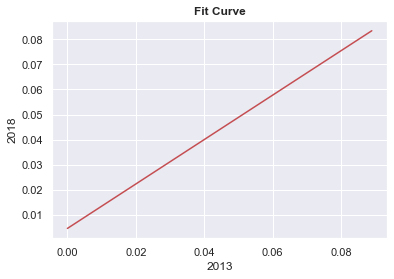

In [81]:
fitting = np.arange(0.0,0.09,0.001)
plt.plot(fitting, func(fitting,*popt),'r')
plt.xlabel('2013')
plt.ylabel('2018')
plt.title('Fit Curve',fontweight='bold')
plt.show()

The above chart shows a linear growth in CO2 emissions (kg per PPP $ of GDP) between year 2013 and 2018.